In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import networkx as nx
from sklearn.cluster import DBSCAN
from tqdm import tqdm

import utils

In [2]:
embs = pd.read_csv('../emb/bitcoin-2dims.emb', names=['X', 'Y'], skiprows=[0], sep=' ')
graph_analysis = pd.read_csv("gammas.csv", index_col=0, header=0)

# Read in original graph
edgelist = pd.read_csv('../graph/bitcoin-undirected.edgelist', header=0, sep=' ', names=['from', 'to'])
G = nx.from_pandas_edgelist(edgelist, 'from', 'to')
embs.head()

,X,Y
65,2.510136,0.154950
79,2.509381,0.148481
170,2.722390,0.233532
103,2.664334,0.236745
168,2.760367,0.173363


In [3]:
#plt.figure(figsize=(18, 18))
#plt.scatter(embs['x'], embs['y'])

In [4]:
# Create clusterings
clustered_embs = utils.enhance_with_clusterings(embs, eps=0.25, min_samples=10)
num_clusters = len(clustered_embs['Cluster'].unique())

In [5]:
clustered_embs = clustered_embs.join(graph_analysis)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


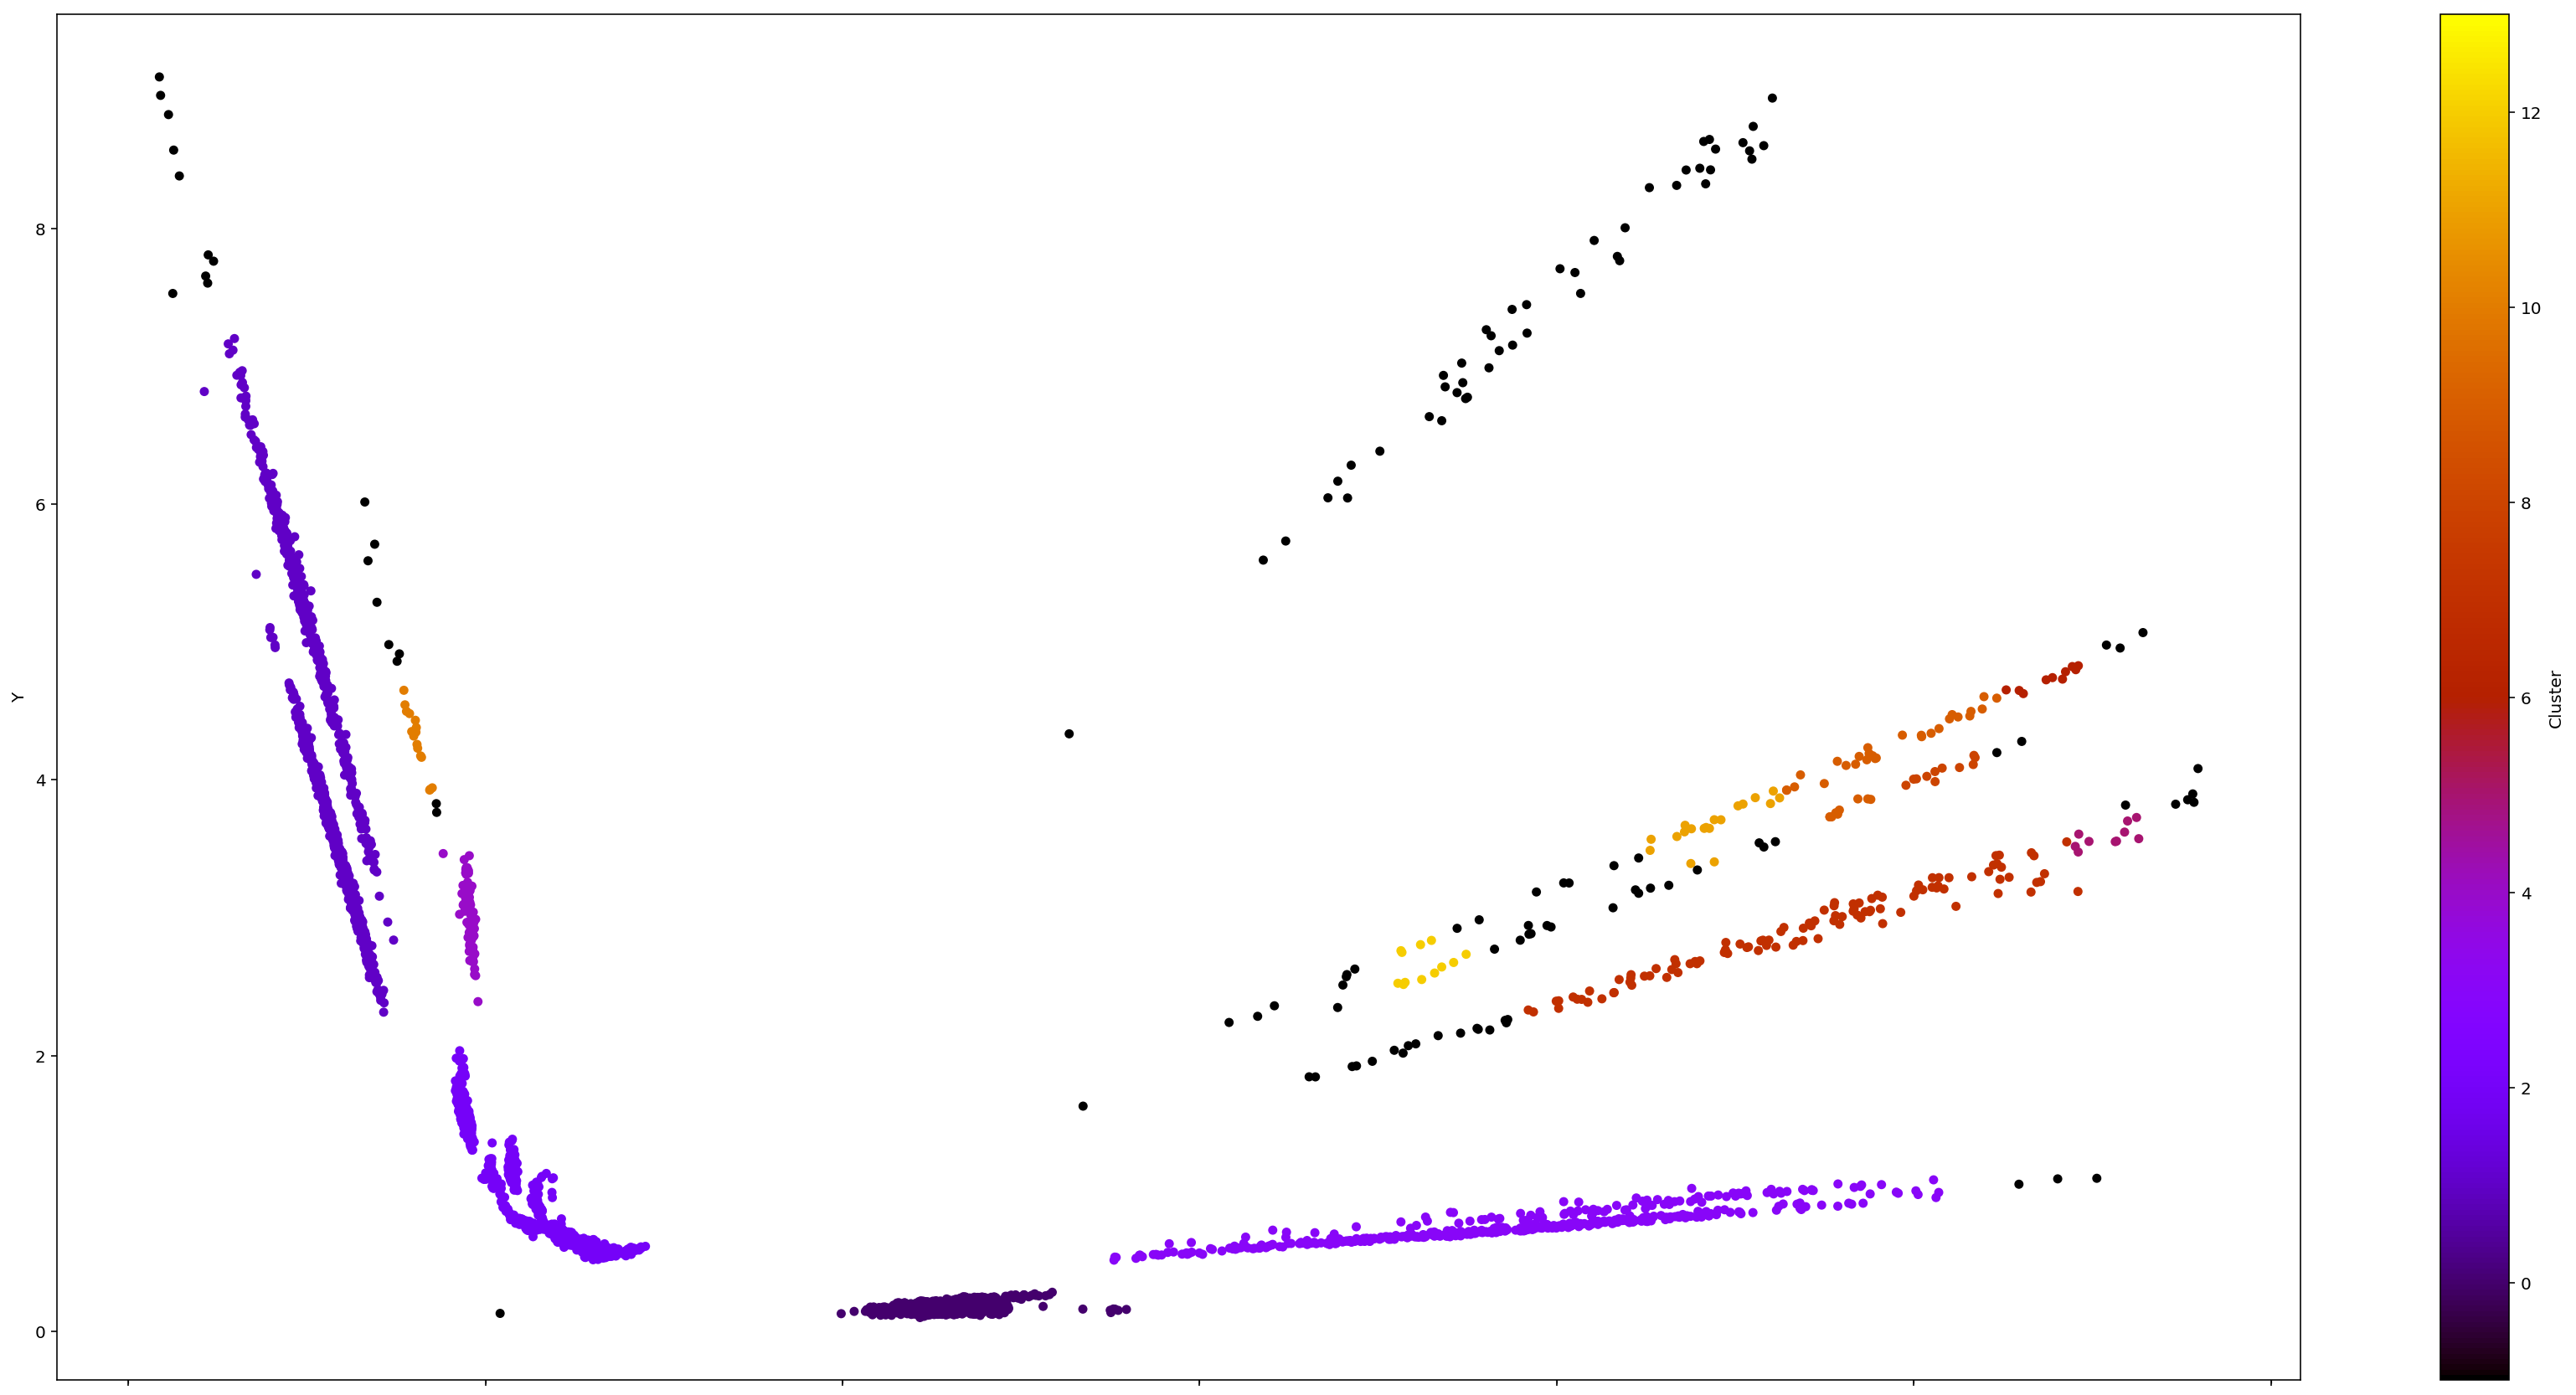

In [6]:
utils.show_clusters(clustered_embs, save=True, save_prefix='img/struc2vec_2dim')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


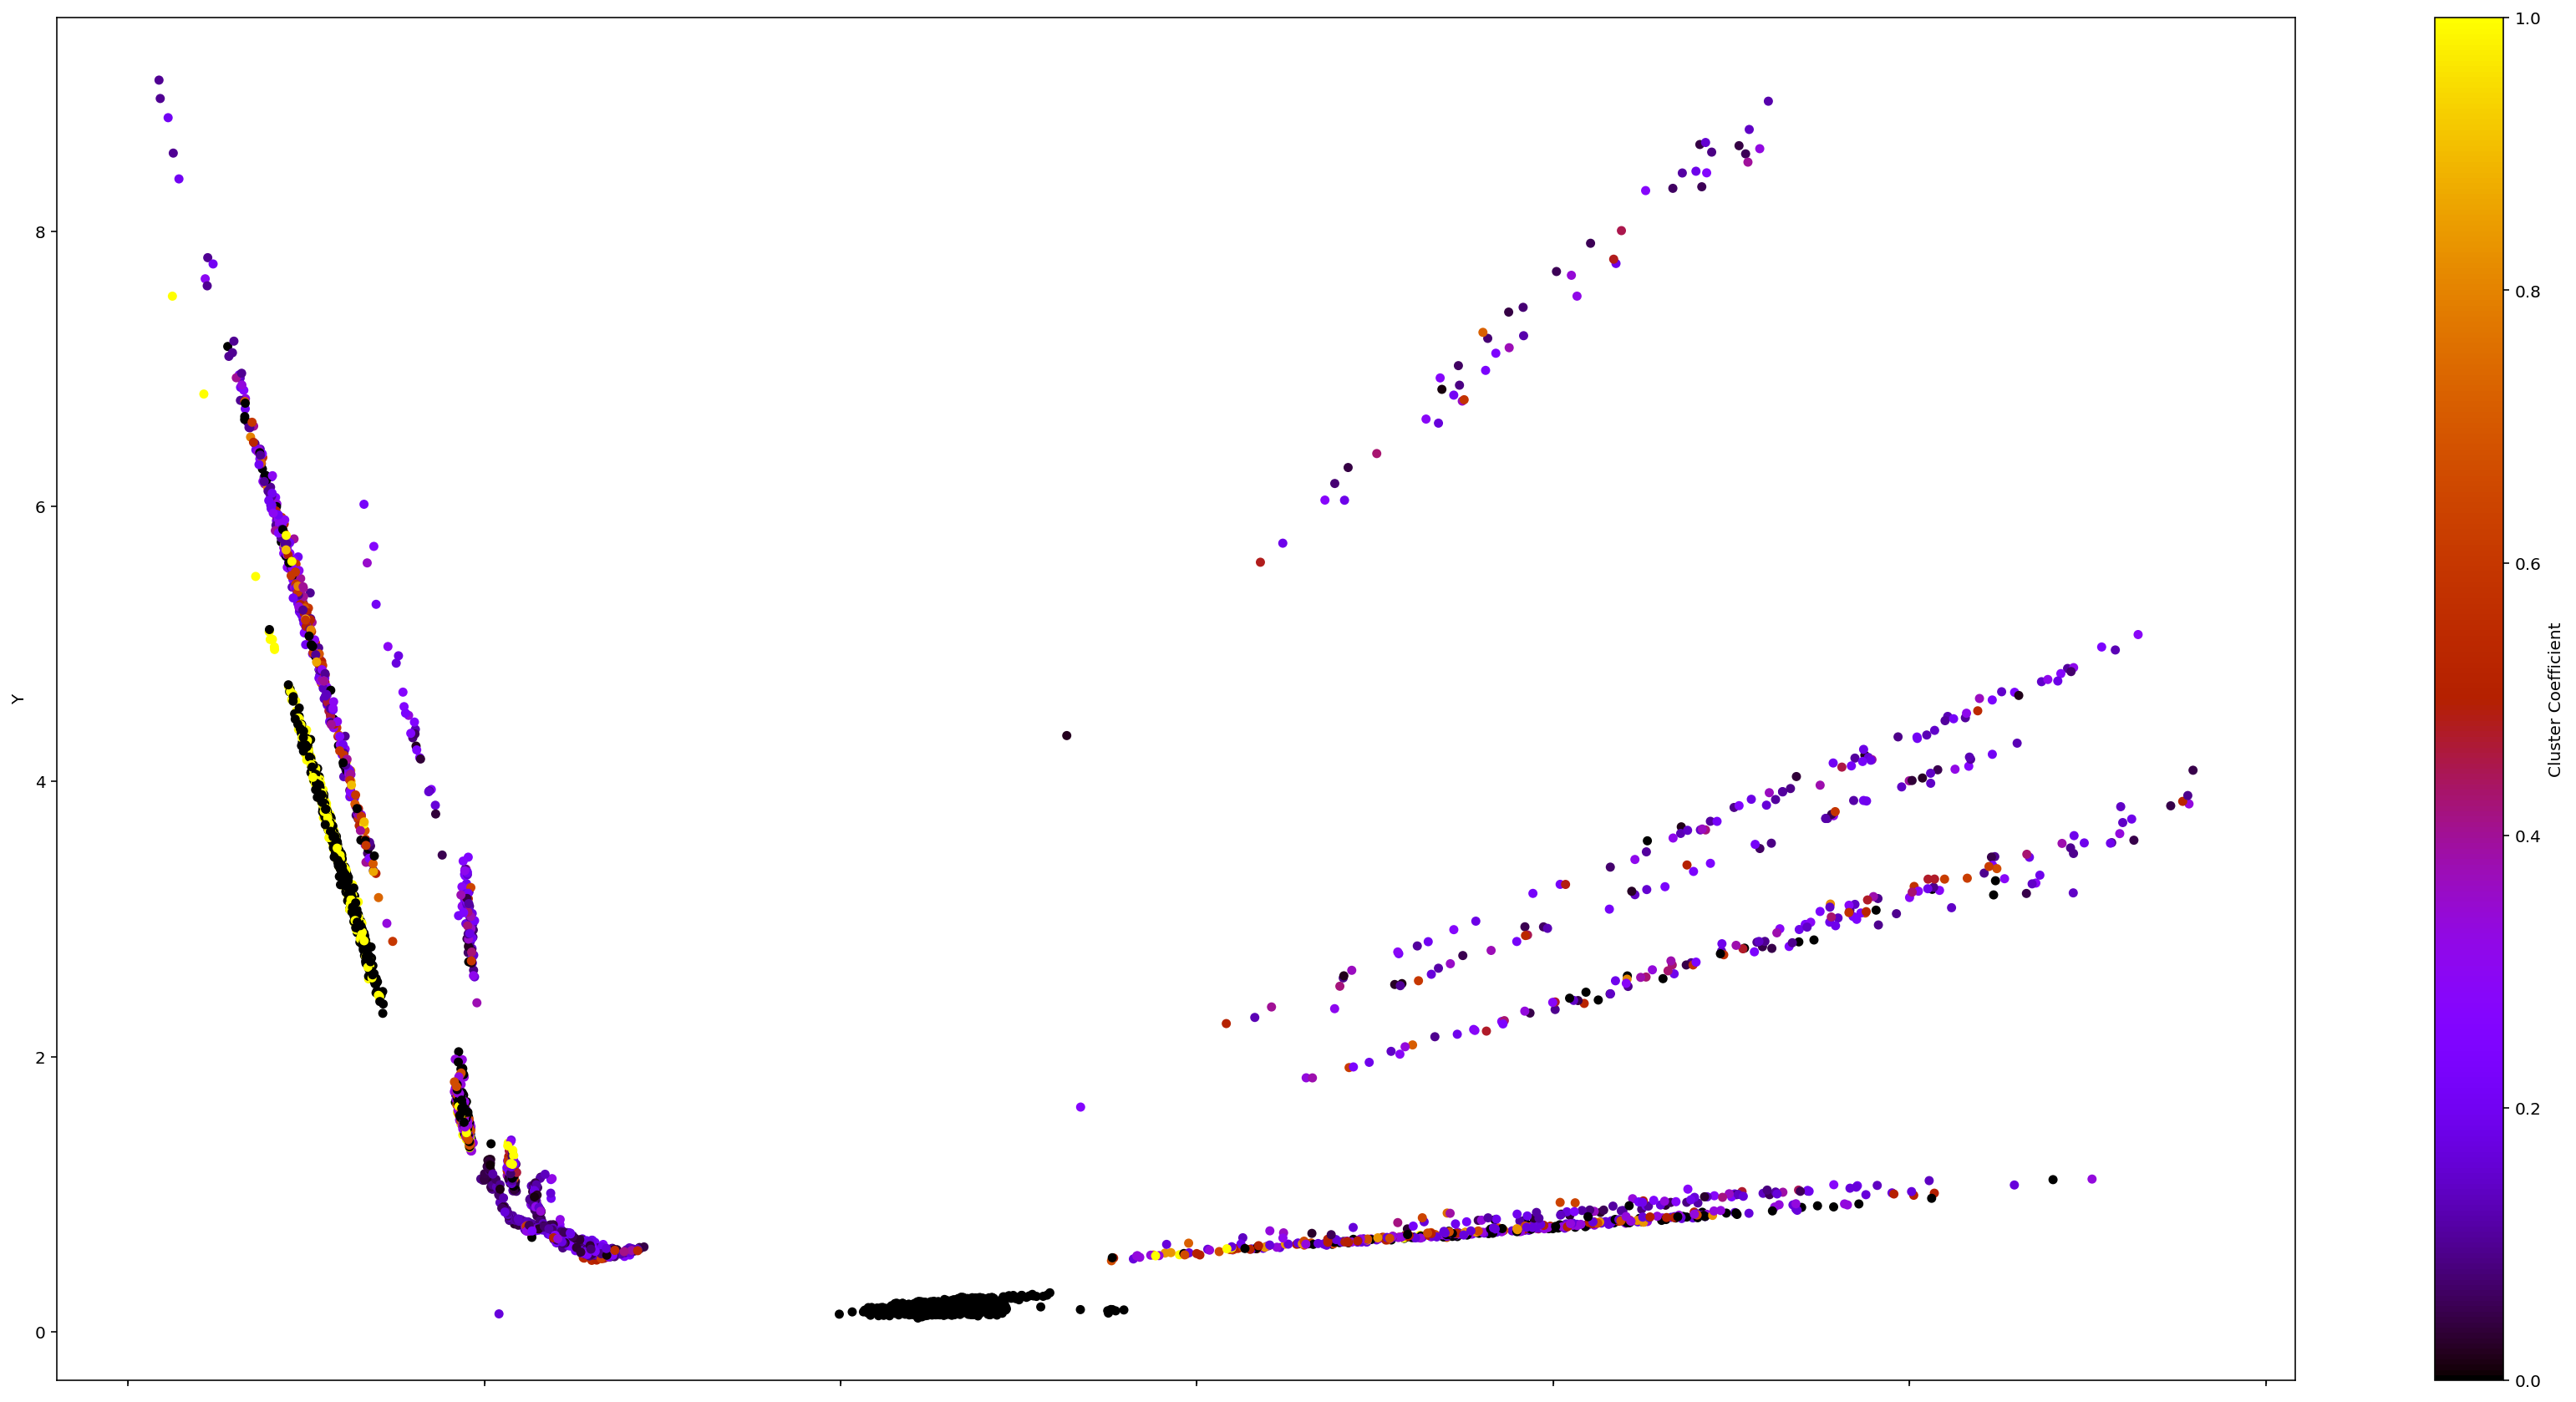

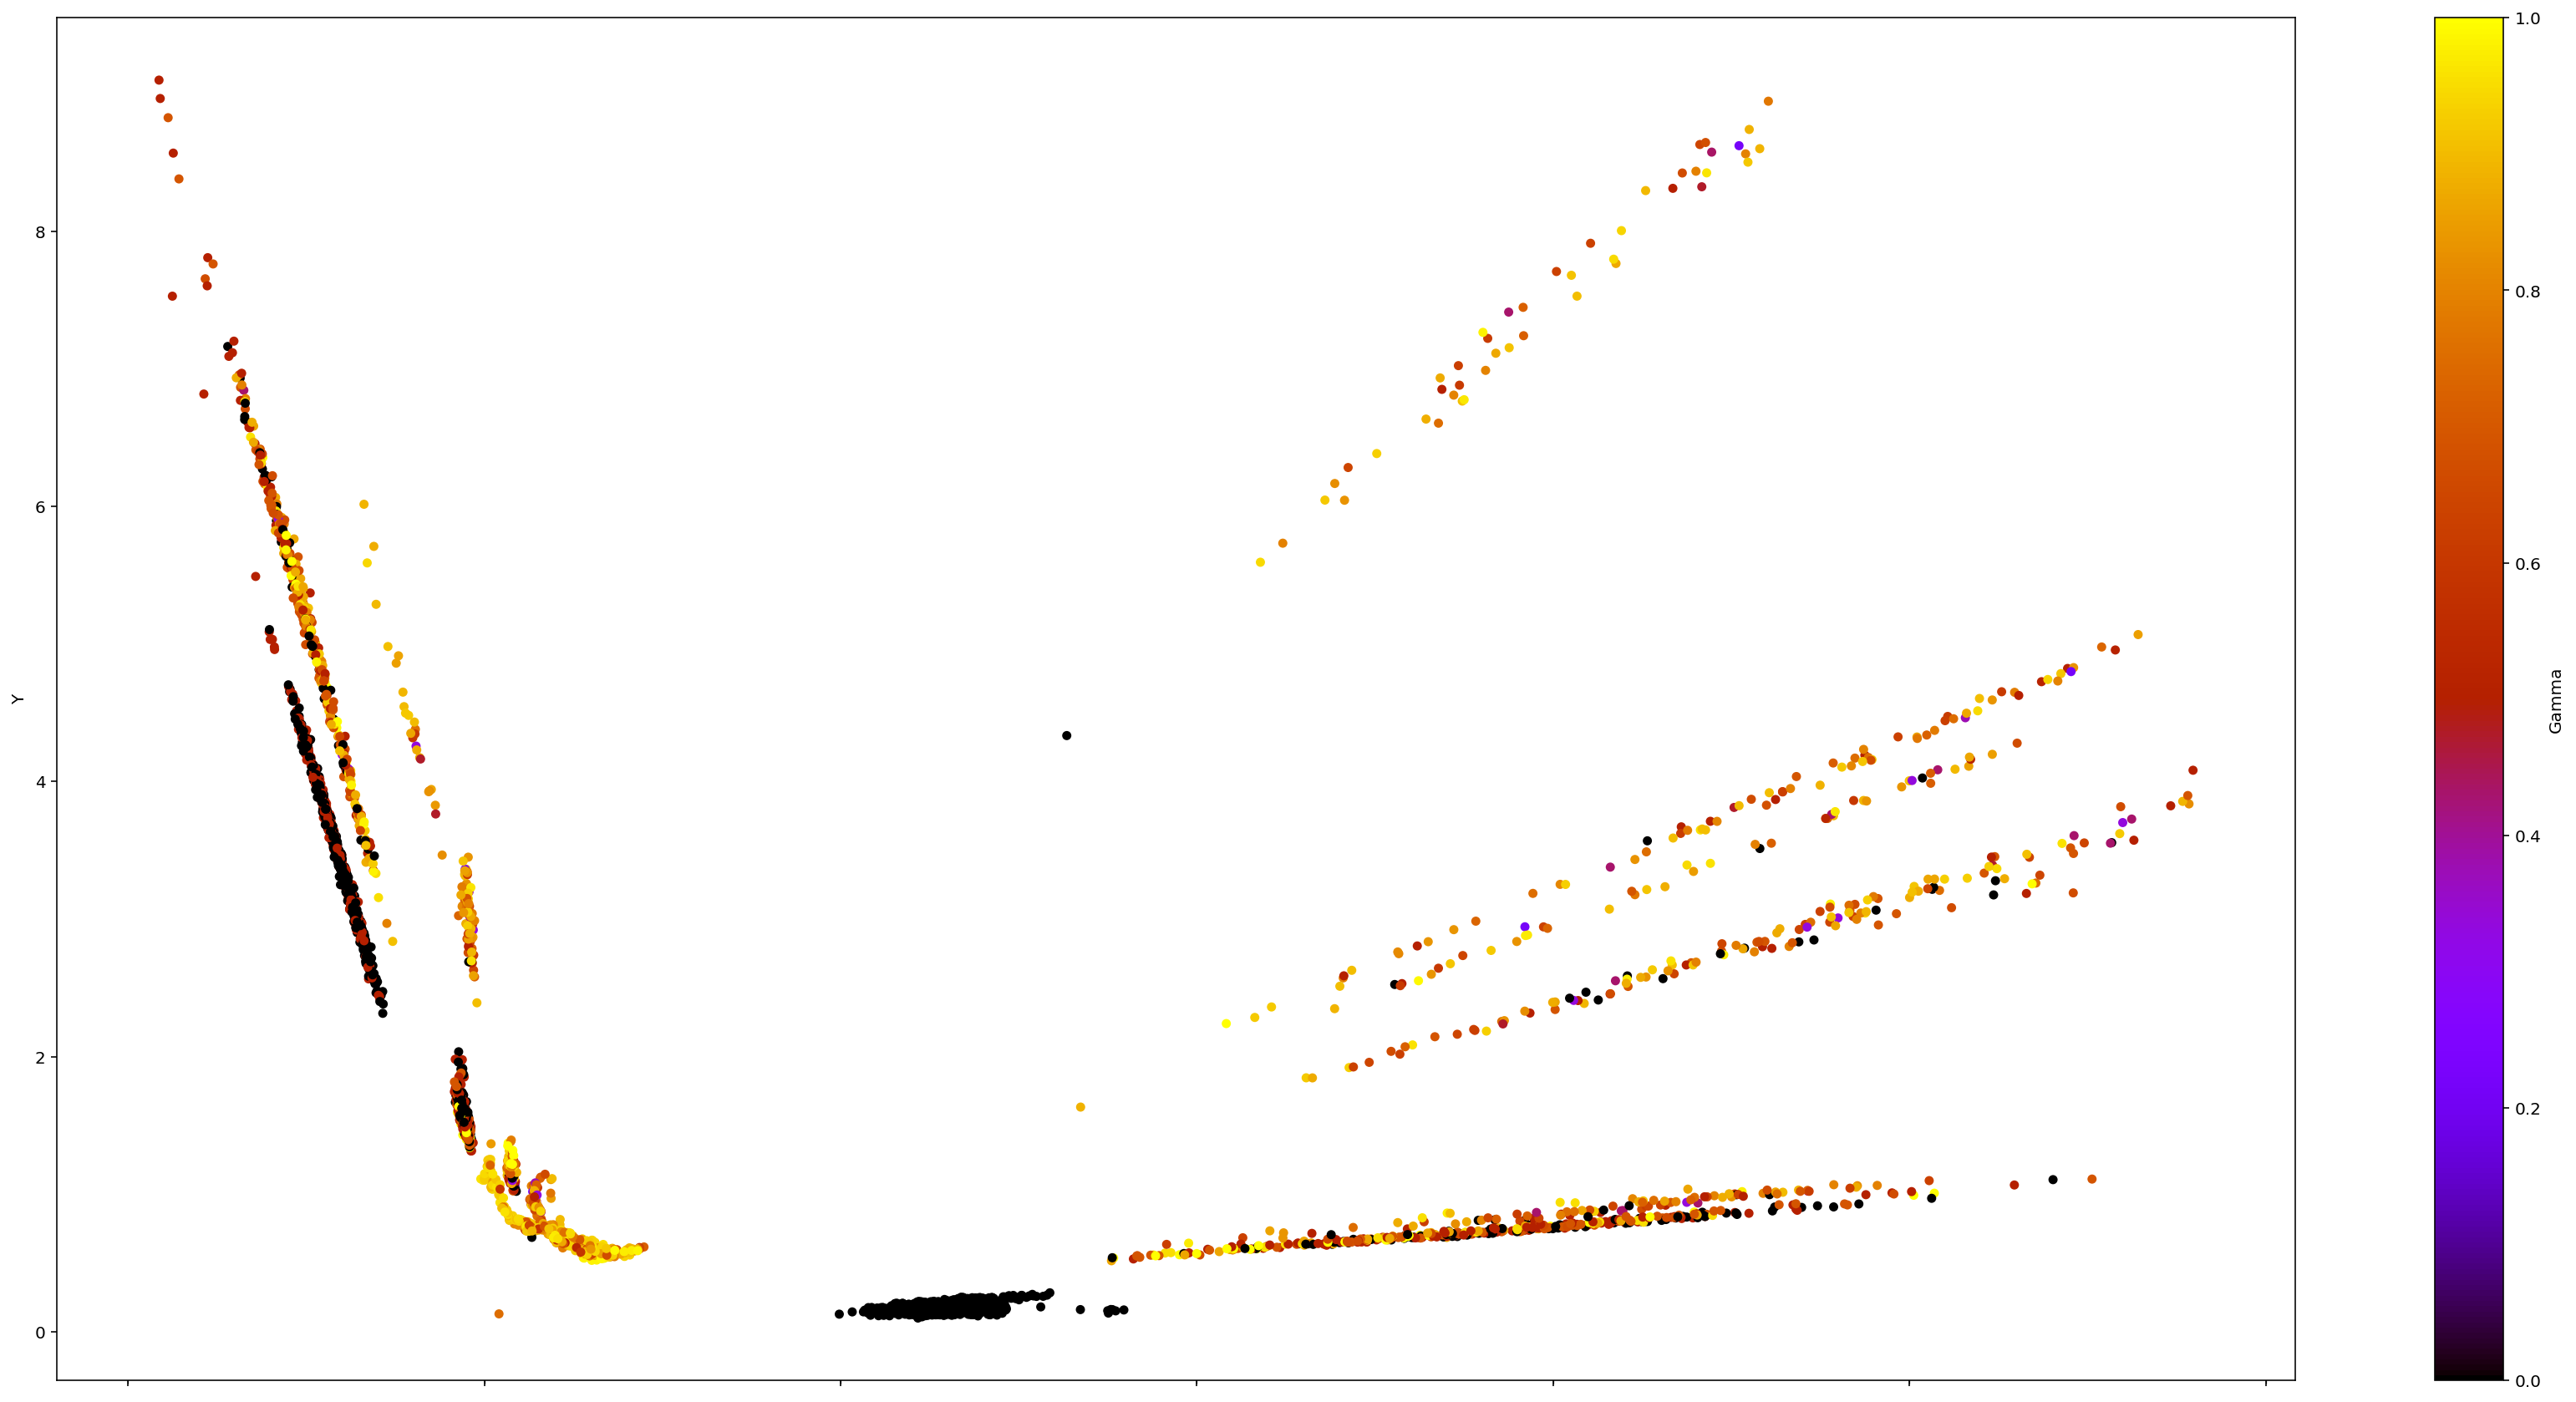

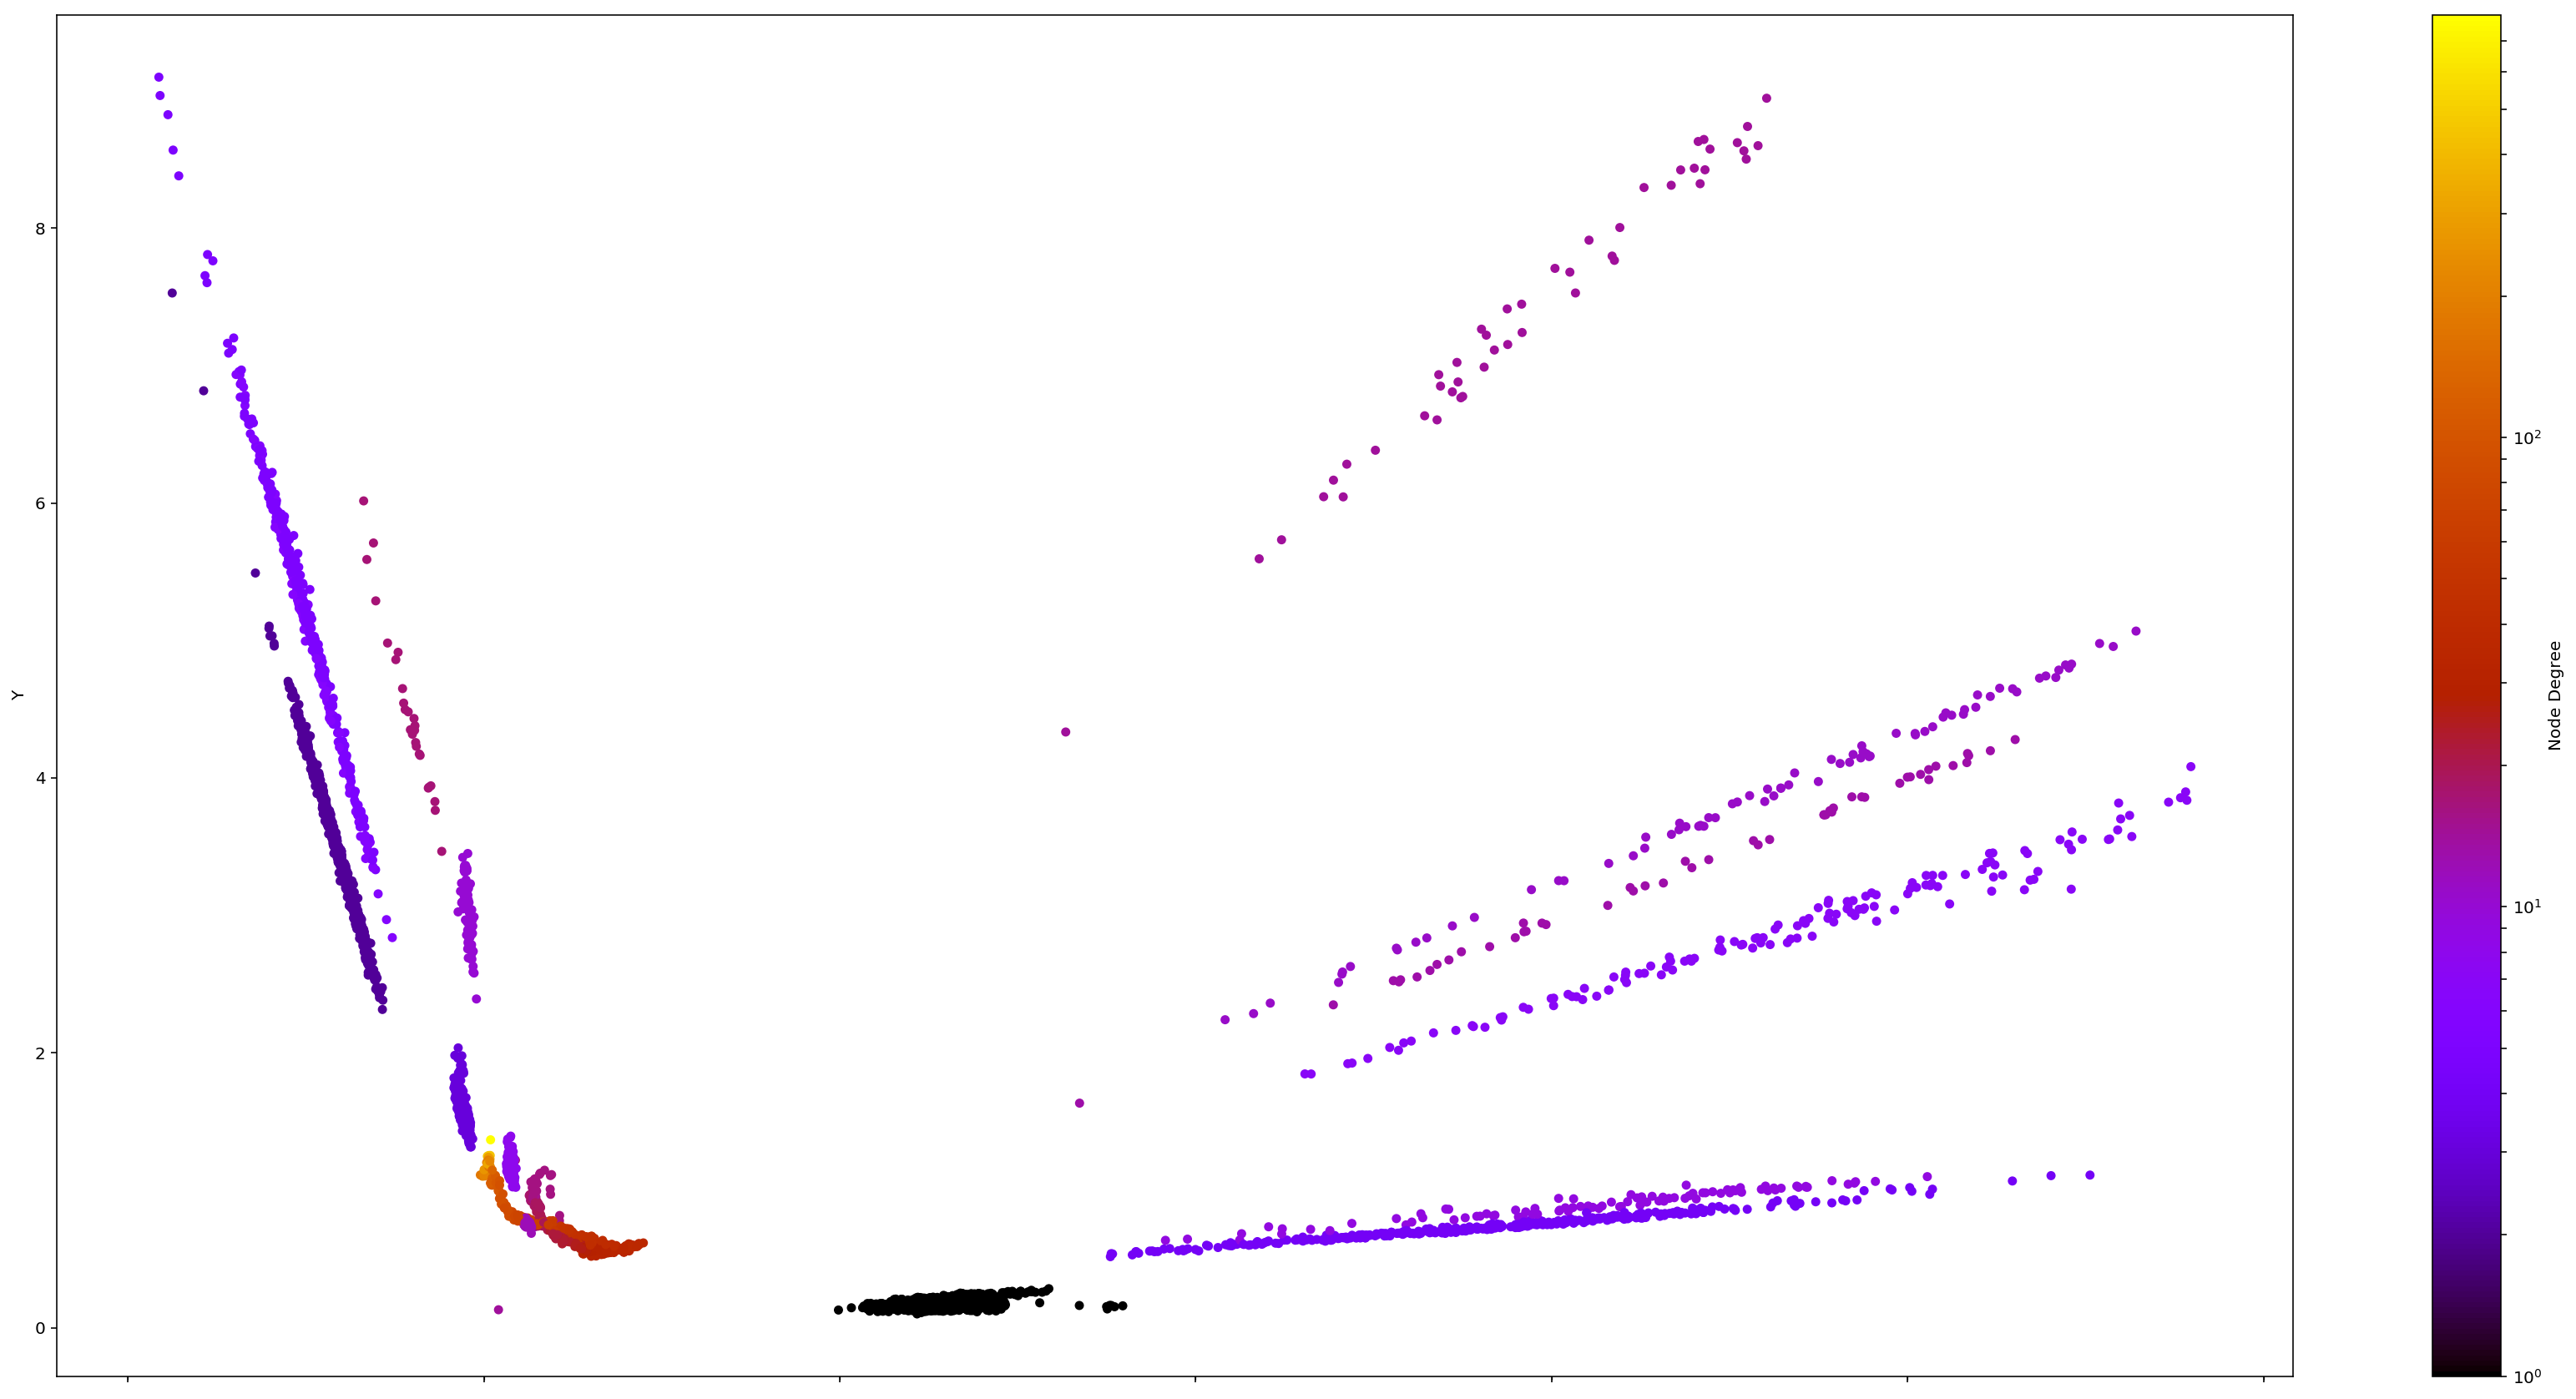

In [7]:
utils.show_embedding_plots(clustered_embs, save=True, save_prefix='img/struc2vec_2dim')